Gradient Descent Chapter

In [8]:
from linear_algebra import Vector, dot
def sum_of_square(v):
    return dot(v, v)

In [9]:
from typing import Callable

In [10]:
def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h)- f(x)) / h

In [11]:
def square(x: float) -> float:
    return x * x

In [12]:
def derivative(x: float) -> float:
    return 2 * x

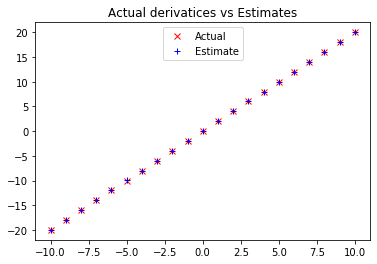

In [13]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.01) for x in xs]

import matplotlib.pyplot as plt
plt.title("Actual derivatices vs Estimates")
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label = 'Estimate')
plt.legend(loc = 9)
plt.show()

In [14]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    w = [v_j + (h if j== i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [15]:
def estimate_gradient(f: Callable[[Vector],float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f,v,i,h) for i in range(len(v))]

In [16]:
import random
from linear_algebra import distance, add, scalar_multiply

In [17]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [18]:
def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

In [19]:
v = [random.uniform(-10, 10) for i in range(3)]

In [20]:
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)
    v = gradient_step(v, grad, -0.01)
    print(epoch, v)

0 [7.791186925474146, 3.948926434478757, 2.380255746044696]
1 [7.635363186964663, 3.869947905789182, 2.3326506311238018]
2 [7.48265592322537, 3.7925489476733985, 2.2859976185013258]
3 [7.333002804760863, 3.7166979687199304, 2.2402776661312993]
4 [7.186342748665646, 3.6423640093455316, 2.195472112808673]
5 [7.042615893692333, 3.569516729158621, 2.1515626705524995]
6 [6.901763575818486, 3.498126394575449, 2.1085314171414495]
7 [6.763728304302116, 3.42816386668394, 2.0663607887986206]
8 [6.628453738216074, 3.359600589350261, 2.025033573022648]
9 [6.495884663451753, 3.292408577563256, 1.984532901562195]
10 [6.365966970182718, 3.226560406011991, 1.9448422435309511]
11 [6.238647630779064, 3.162029197891751, 1.905945398660332]
12 [6.113874678163483, 3.098788613933916, 1.8678264906871254]
13 [5.991597184600213, 3.036812841655238, 1.8304699608733828]
14 [5.871765240908209, 2.976076584822133, 1.7938605616559151]
15 [5.754329936090045, 2.9165550531256903, 1.7579833504227969]
16 [5.639243337368244

In [21]:
assert distance(v, [0, 0, 0]) < 0.01

In [22]:
inputs = [(x, 20 * x+ 5) for x in range(-50, 50)]

In [24]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [25]:
from linear_algebra import vector_mean

In [26]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

In [27]:
learning_rate = 0.001

In [28]:
for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [33.16179139745955, 0.46715396110431734]
1 [11.216552291855582, 0.4893814445795682]
2 [25.85404900277691, 0.4896192339822647]
3 [16.090838934381786, 0.5044940445170771]
4 [22.602914924811866, 0.5095758953624248]
5 [18.25936532104585, 0.5211596584965117]
6 [21.156524490520916, 0.5283767045005645]
7 [19.22412654152705, 0.5384764755820842]
8 [20.51304607327704, 0.5466236491724471]
9 [19.653344892773386, 0.5560434479473791]
10 [20.2267749999681, 0.5645847059442578]
11 [19.844305659727222, 0.5736823115323374]
12 [20.099421807273476, 0.5823792525689999]
13 [19.92926803380116, 0.5913139158711354]
14 [20.042769535370496, 0.6000605560731942]
15 [19.96707278046395, 0.6089032044964183]
16 [20.017571358635042, 0.6176524708678894]
17 [19.983897556261294, 0.6264347372847886]
18 [20.006366764711, 0.6351657653664804]
19 [19.99138853370313, 0.6439018006004584]
20 [20.001387749820612, 0.6526053855329607]
21 [19.994726976255183, 0.6613015625117153]
22 [19.999178408400304, 0.6699736863629471]
23 [19.996

In [29]:
slope, intercept = theta
assert 19.9 < slope < 20.1

In [30]:
assert 4.9 < intercept < 5.1

In [31]:
from typing import TypeVar, List, Iterator
T = TypeVar('T')

In [32]:
def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle:
        random.shuffle(batch_starts)
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start: end]

In [33]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

In [34]:
for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [19.3678309712917, 0.766290194692992]
1 [20.013971206645266, 0.8247994585447854]
2 [20.00477418760714, 0.850534253016129]
3 [19.998117855807184, 1.0353819729215605]
4 [21.652449320692707, 1.1396444950677955]
5 [20.13368042239749, 1.3875870206534664]
6 [20.54991502606629, 1.4711092813369868]
7 [20.271162247494548, 1.4737592494872278]
8 [20.54410400791453, 1.577392395319562]
9 [20.044380157901607, 1.7479879145101491]
10 [18.52279604558658, 1.8358806740042357]
11 [20.038145486795422, 1.7764219374035852]
12 [20.65060481357905, 1.809028522593501]
13 [19.532404604446786, 1.766461805466645]
14 [19.820859975532578, 1.8000193811278344]
15 [19.83652319047759, 1.8196015004019512]
16 [19.881300388148276, 1.8343217321815906]
17 [19.247039125963784, 1.8696691373518728]
18 [20.091052249513282, 1.8472742488734912]
19 [19.87268408568016, 1.9876146554447434]
20 [20.097835343701803, 2.0145793649735175]
21 [19.99511313640044, 2.029678388099353]
22 [19.890012972361514, 2.0643947475716202]
23 [21.22176605

In [35]:
slope, intercept = theta

In [36]:
assert 19.9 < slope < 20.1

In [37]:
assert 4.9 < intercept < 5.1

In [38]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

In [39]:
for epoch in range(1000):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

0 [20.108427116933093, -0.39664872507870896]
1 [20.103774570660164, -0.16511217568694683]
2 [20.099322237552155, 0.05649057214212572]
3 [20.095060962899886, 0.26858572844683115]
4 [20.090982479768172, 0.4715812046965454]
5 [20.08707900635132, 0.6658674113224546]
6 [20.08334298032823, 0.8518180087296849]
7 [20.079767255418442, 1.029790625641576]
8 [20.076344929425478, 1.2001275474135111]
9 [20.07306944755609, 1.3631563741500934]
10 [20.06993451253905, 1.5191906512057096]
11 [20.066934038456033, 1.6685304705650825]
12 [20.06406231559389, 1.8114630492965116]
13 [20.061313795777725, 1.9482632824456214]
14 [20.058683215696888, 2.079194270991737]
15 [20.056165493125306, 2.204507827828496]
16 [20.053755764271813, 2.324444961328537]
17 [20.05144944141218, 2.439236340183402]
18 [20.049242065032704, 2.549102736932969]
19 [20.047129392333876, 2.6542554517675945]
20 [20.045107390627205, 2.7548967199485928]
21 [20.043172073721056, 2.8512200986952148]
22 [20.04131985214266, 2.943410841750764]
23 [20

In [40]:
slope, intercept = theta
assert 19.9 < slope < 20.1
assert 4.9 < intercept < 5.1